# Random Forest Classification from Scratch using Tree Function
Every decision tree has high variance, but when we combine all of them together in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data and hence the output doesn’t depend on one decision tree but multiple decision trees. In the case of a classification problem, the final output is taken by using the majority voting classifier. In the case of a regression problem, the final output is the mean of all the outputs.<br>
A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.<br>
Random Forest work on three functions :-<br>
(1) Boot Strapping<br>
(2) Random Subspace<br>
(3) Prediction
# ----------------------------------------------------------------------------------------------------------------------------------------------------------
## Importing Libraries
The Random Forest Algorithm is use from tree module fully Created By Anubhav Sharma

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from pprint import pprint
%matplotlib inline

from Tree.DecisionTreeFunction import DecisionTreeAlgorithm, DecisionTreePrediction
from Tree.HelperFunction import train_test_split, calculate_accuracy
from Tree.RandomForestFunction import RandomForestAlgorithm, RandomForestPrediction

# Dataset 1 (Continuous)

# ----------------------------------------------------------------------------------------------------------------------------------------------------------
### Calling Data
Data is call for work. The Columns are selected here is according to the WINE QUALITY DATASET of RED WINE find on Kaggle(www.kaggle.com).<br>
Creating Dataset from original columns from the dataset so that you won't face any trouble regarding the dataset. I use Wine Quality Dataset to train model and predict whether the wine is having good or bad Quality.

In [2]:
wine_df = pd.read_csv("./Dataset/Wine Quality Dataset/winequality-red.csv")

## Preprocessing of data

In [3]:
wine_df["label"] = wine_df.quality
wine_df = wine_df.drop("quality", axis=1)

column_names = []
for column in wine_df.columns:
    name = column.replace(" ", "_")
    column_names.append(name)
wine_df.columns = column_names

#### Ploting Wine Quality

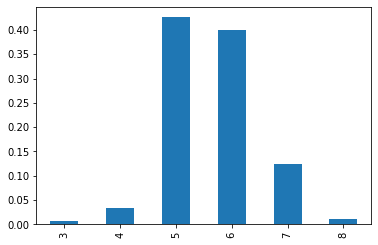

In [4]:
wine_quality = wine_df.label.value_counts(normalize=True)
wine_quality = wine_quality.sort_index()
wine_quality.plot(kind="bar")

### Transforming Label
Transforming label from 10 different labels to 2 labels of GOOD or BAD Quality

In [5]:
def transform_label(value):
    if value <= 5:
        return "bad"
    else:
        return "good"

wine_df["label"] = wine_df.label.apply(transform_label)

#### Ploting Wine Quality after Transform label

good    0.534709
bad     0.465291
Name: label, dtype: float64

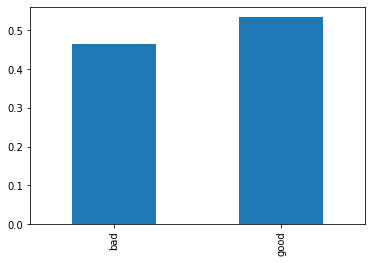

In [6]:
wine_quality = wine_df.label.value_counts(normalize=True)
wine_quality[["bad", "good"]].plot(kind="bar")
wine_quality

### Train Test Split

In [7]:
random.seed(0)
train_wine, test_wine = train_test_split(wine_df, test_size=0.2)

### Random Forest Algorithm
Random Forest Algorithm from Random forest function created by Anubhav Sharma

In [8]:
wine_forest = RandomForestAlgorithm(train_wine,n_trees=4,mltask='classification',n_bootstrap=800,n_feature=5,dt_max_depth=4)

### Accuracy Prediction
#### Training Data

In [9]:
prediction_wine_train = RandomForestPrediction(train_wine,wine_forest)
accuracy_wine_train = calculate_accuracy(prediction_wine_train,train_wine.label)
print("-------------------------------------------------\n")
print("Accuracy over Wine Quality Training Data : {}".format(accuracy_wine_train))
print("\n-------------------------------------------------")

-------------------------------------------------

Accuracy over Wine Quality Training Data : 0.7474589523064894

-------------------------------------------------


#### Testing Data

In [10]:
prediction_wine_test = RandomForestPrediction(test_wine,wine_forest)
accuracy_wine_test = calculate_accuracy(prediction_wine_test,test_wine.label)
print("-------------------------------------------------\n")
print("Accuracy over Wine Quality Testing Data : {}".format(accuracy_wine_test))
print("\n-------------------------------------------------")

-------------------------------------------------

Accuracy over Wine Quality Testing Data : 0.746875

-------------------------------------------------


# DataSet 2 (Catagorical Data)

# ----------------------------------------------------------------------------------------------------------
### Calling Data
Data is call for work. The Columns are selected here is according to the TITANIC DATASET. Easily find on Kaggle(www.kaggle.com).<br>
Removing unnecessary columns from the dataset so that you won't face any trouble regarding the dataset. I use Titanic Dataset to train model and predict whether the person is having cancer or not.

In [11]:
titanic_df = pd.read_csv('./Dataset/Titanic Dataset/train.csv')

## Preprocessiong of data

In [12]:
titanic_df['label'] = titanic_df.Survived

titanic_df.drop(['PassengerId','Survived','Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)

median_age = titanic_df.Age.median()
titanic_df = titanic_df.fillna({'Age' : median_age})

### Train Test Split

In [13]:
train_titanic, test_titanic = train_test_split(titanic_df,test_size=0.25)

### Random Forest Algorithm
Random Forest Algorithm from Random forest function created by Anubhav Sharma

In [14]:
titanic_forest = RandomForestAlgorithm(train_titanic,n_trees=10,mltask='classification',n_bootstrap=500,n_feature=4,dt_max_depth=10)

### Accuracy Prediction
#### Training Data

In [15]:
prediction_titanic_train = RandomForestPrediction(train_titanic,titanic_forest)
accuracy_titanic_train = calculate_accuracy(prediction_titanic_train,train_titanic.label)
print("-------------------------------------------------\n")
print("Accuracy over Titanic Training Data : {}".format(accuracy_titanic_train))
print("\n-------------------------------------------------")

-------------------------------------------------

Accuracy over Titanic Training Data : 0.9116766467065869

-------------------------------------------------


#### Testing Data

In [16]:
prediction_titanic_test = RandomForestPrediction(test_titanic,titanic_forest)
accuracy_titanic_test = calculate_accuracy(prediction_titanic_test,test_titanic.label)
print("-------------------------------------------------\n")
print("Accuracy over Titanic Testing Data : {}".format(accuracy_titanic_test))
print("\n-------------------------------------------------")

-------------------------------------------------

Accuracy over Titanic Testing Data : 0.8161434977578476

-------------------------------------------------
